# **MN1: 2º parcial (programación) 18/06/2020**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones de edición del Notebook y entrega**

*   Abre el Notebook desde GitHub ("Open in Colab") y genera una copia en tu Drive ("Guardar una copia en Drive"). Edita esa copia para el examen. Ve guardando el notebook de vez en cuando!
*   Renombra esa copia como usando tu NIU como nombre de archivo: "NIU.ipynb" (*por ejemplo, 2055007.ipynb*)
*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu examen) en la cabecera de este Notebook.
*   Al final del examen, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](http://cern.ch/go/FQ9X). Asegurate de que el fichero tiene el nombre correcto.
*   Podéis volver a subir el fichero si creéis que hay un error pero sólo consideraremos la última versión, y dentro del horario establecido.
*   **NOTA** Antes de entregar o dar por finalizado cada ejercicio, es recomendable reiniciar el entorno de ejecución para ver que se ejecuta todo de forma correcta: "Entorno de ejecución >> Reiniciar entorno de ejecución",y luego "Entorno de ejecución >> Ejecutar todas".

<hr>

**Instrucciones del examen**

*   El examen es de 9h a 12h. No se aceptarán entregas pasada esa hora.
*   Podéis consultar apuntes, entregas o usar internet para buscar información, pero no comunicaros entre vosotros/as.
*   Es obligatorio conectarse a la sesión de MS Teams durante la realización del examen. [Link](http://cern.ch/go/6mhN)
*   Podéis utilizar el chat privado con los profesores para hacer consultas durante el examen y si hay una duda general que afecte a todos, se puede comentar en voz alta utilizando esta herramienta o usando el chat general.
*   **NOTA:** Se llamará aleatoriamente a ciertos alumnos para que nos expliquen cómo han hecho el examen, antes de publicar las notas.

<hr>

## **EXAMEN**

In [ ]:
# Ejecuta esta parte de código para importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import random

## <font color='green'>**> Ejercicio #1 [3.5 puntos]**</font>

Queremos determinar el área comprendida en una superficie delimitada por dos parábolas usando el método Monte Carlo. Compararemos con el cálculo analítico y estimaremos el error cometido como función del número de puntos considerados en el cálculo.

**1.1 [1.25 puntos]:** Representa gráficamente las parábolas $y_1=1 - x^2$ y $y_2=x^2$, en el intervalo de x = [-1, 1]. Determina analíticamente el área comprendida entre ellas (intersección), asigna el valor a una variable y muestra el valor de la integral analítica por pantalla (con 3 dígitos). Puedes usar el text box para mostrar el desarrollo de la integral analítica.


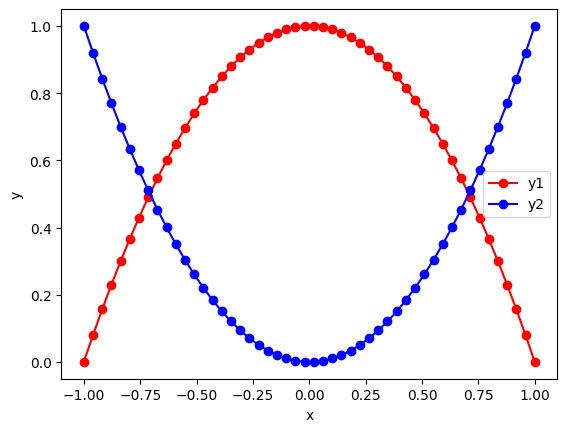

0.9428090093333333 unidades^2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def y1(x):
  return 1-x**2
def y2(x):
  return x**2
valoresy1=[]
valoresy2=[]
valoresx= np.linspace(-1,1,50)
for i in valoresx:
  valoresy1.append(y1(i))
  valoresy2.append(y2(i))
plt.plot(valoresx,valoresy1,color="red", marker="o",label="y1")
plt.plot(valoresx,valoresy2,color="blue", marker="o",label="y2")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Representación y(x)")
plt.legend()
plt.show()
idfy1_corte=0.707-0.707**3/3-(-0.707+0.707**3/3)
idfy2_corte=2*0.707**3/3
Area=idfy1_corte-idfy2_corte
print(Area,"unidades^2")

In [ ]:
""""
import numpy as np

pvalid = []
pnovalid = []

for i in range(int(1e6)):
    t = np.random.uniform(-1, 1, 2)
    x, y = t
    if -0.707 <= x <= 0.707 and x**2 <= y <= 1 - x**2:
        pvalid.append(t)
    else:
        pnovalid.append(t)

ptot = pvalid + pnovalid
AreaMC = (len(pvalid) / len(ptot)) * 4  # área total del cuadrado [-1,1] × [-1,1]
print("Área Monte Carlo:", AreaMC)
""""

Área Monte Carlo: 0.941572


*Ejercicio 1.1: integral analítica. Desarrollo*

Tu texto aquí

**1.2 [1.25 puntos]:** Determina el área comprendida entre las dos parábolas por el método Monte Carlo usando N=1000 puntos. Representa gráficamente las parábolas, los puntos aceptados en verde, los puntos rechazados en rojo, y muestra por pantalla en valor de la integral MC y el de la integral analítica (las dos con 3 dígitos).


In [ ]:
"""
pvalid=[]
pnovalid=[]
ptot=pvalid+pnovalid
for i in range(int(1e6)):
  t=np.random.uniform(-1,1,2)
  if -0.707>=t[1]<=0.707:
    if t[2]+t[1]**2<=1:
      if t[2]-t[1]**2<=0:
        pvalid.append(t)
        else pnovalid.append(t)
      else pnovalid.append(t)
    else pnovalid.append(t)
#muchos errores aquí, indices fueras de rango ,condiciones mal puestas y he puesto los else como si fueran condiciones del if, van a la misma altura que el if.
"""
def AMC(N):
  pvalid=[]
  pnovalid=[]
  #ptot=pvalid+pnovalid #si defines esto aquí antes del bucle tendrá para siempre dos lista vacías, entonces esto se define después del bucle
  for i in range(int(N)):
    t=np.random.uniform(-1,1,2)
    #if -0.707<=t[0]>=0.707: #esto me he rayado escribiendo pyton lo interpreta como (-0.707 <= t[0]) and (t[0] >= 0.707)
    #if -0.707 <= t[0] <= 0.707 and t[1]+t[0]**2<=1 and t[1]-t[0]**2<=0 : #despeja y ponlo como una sola cond(pq no sé que coño está haciendo poniendolo así)
    if -0.707 <= t[0] <= 0.707 and t[0]**2<=t[1]<=1-t[0]**2 :
      pvalid.append(t)
    else:
      pnovalid.append(t)
  ptot=pvalid+pnovalid
  #AreaMC=(sum(pvalid)/sum(ptot))*2**2  #esto esta mal pq hemos definido los puntos como un vector 2D
  #es un cuadrado de -1 a 1 por tanto lado 2, 2x2
  AreaMC=(len(pvalid)/len(ptot))*2**2
  return AreaMC

**1.3 [1 punto]:** Determina el error relativo en % cometido en el cálculo de la integral con el método Monte Carlo como función del número de puntos que se usan. Varía N de 100 a 10000 (en pasos de 100) y haz una gráfica del error relativo en % en función de N. El error relativo es:

$$
Error (\%) = 100. | \frac{I_{MC}-I_{analítica}}{I_{analítica}} |
$$

1.08
0.984
0.904


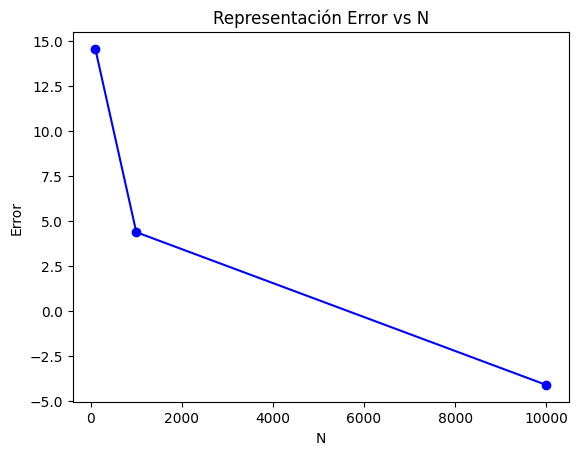

In [ ]:

def Error(N):
  return 100*(AMC(N)-Area)/Area #recuerda que si no pones return no devuelve nada

lista=[Error(N)for N in [100,1000,10000]]

plt.plot([100,1000,10000],lista,color="blue",marker="o")
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Representación Error vs N")
plt.show()



## <font color='green'>**> Ejercicio #2 [3 puntos]**</font>

En el primer parcial de la asignatura teníamos que resolver un problema de cálculo de probabilidad de forma analítica. En este ejercicio veremos cómo se puede resolver de forma algorítmica.

Recordemos primero el enunciado del problema: tenemos una baraja de 52 cartas (4 palos de 13 cartas). Las barajamos y separamos en dos pilas de 26 cartas. Cogemos la primera carta de una de las pilas y vemos que es un rey. Metemos la carta en la otra pila y la volvemos a barajar. Tomamos la primera carta de esta pila. Cuál es la probabilidad de que esta segunda carta sea un rey? El valor de la probabilidad frecuentista vimos que se acerca al valor de $P \sim 0.0937$.

Para calcular una probabilidad de este tipo podemos usar la definición frecuentista, en la que para un número $N$ de realizaciones del experimento se calcula la probabilidad como:

$$
P(A) = \frac{\text{# de veces que ha ocurrido A}}{N}
$$

que tiende al valor real si $N \to \infty$.

Implementaremos un algoritmo que simula $N=50000$ realizaciones de este experimento y cuenta cuántas veces ocurre que la segunda carta sea un rey habiendo salido un rey de la primera pila que se ha puesto en la segunda pila.

>**Nota** Para modelizar este escenario tendrás que utilizar herramientas de generación y manipulación de arrays. Puedes generar un array de 52 números enteros que se correspondan a cada carta de la baraja. Para barajar un array puedes usar el método ``random.shuffle(a)`` y para dividir un array en subarrays puedes usar la sintaxis ``a[0:10]``.

Os ponemos unos ejemplos en código:

In [ ]:
# Ejemplo de barajar una lista:

a = [1,2,3,4,5,6]
print("La lista antes de barajar es:",a)
random.shuffle(a)
print("La lista después de barajar es:",a)

# Ejemplo dividir una lista en dos:

print("La primera mitad de la lista es",a[0:3],"y la segunda mitad es",a[3:7])
b = a[0:3]
c = a[3:7]
print("La primera mitad de la lista es",b,"y la segunda mitad es",c)

La lista antes de barajar es: [1, 2, 3, 4, 5, 6]


NameError: name 'random' is not defined

**2.1 [3 puntos]:** Genera una gráfica mostrando cómo evoluciona la probabilidad P a medida que $N$ aumenta (de 1 a 50000). Puedes ver mejor esta gráfica si haces que el eje x esté en escala logarítmica. Dibuja una recta a $P = 0.0937$, imprime en pantalla la probabilidad correspondiente después de haber realizado las 50000 realizaciones (con 3 dígitos) y muestra también el error relativo en % cometido en el cálculo, comparando con el valor de $ P = 0.0937$ (con 3 dígitos).

In [176]:

""""
def P(N):
  r=0
  for i in range(int(N)):
    palos=list(np.linspace(1,13,13))
    baraja=palos+palos+palos+palos
    random.shuffle(baraja)
    unaparte=baraja[0:26]
    otraparte=baraja[27:52]
    numerin=int(np.random.uniform(0,25,1))
    cartarandom=unaparte[numerin]
    if cartarandom==13:
      #unaparte.pop([int(np.random.uniform(0,25,1))]) unaparte.pop(indice) y tu le estas dando una lista amigo
      otraparte.append(unaparte[numerin])
      unaparte.pop(numerin)
      random.shuffle(otraparte)
      cartarndm2=otraparte[0]
      if cartarndm2==13:
        r=r+1
  return r/N

Lista=[]
Error=[]
for i in list(np.linspace(1,50000,50000)):
  Prob=P(i)
  Lista.append(Prob)
  Error.append(abs(Prob-0.0937)/0.0937)

plt.plot(np.linspace(1,50000,50000),Lista,label="Probabilidad",color="blue",marker="o")
plt.plot(np.linspace(1,50000,50000),Error,label="Errores",color="red",marker="o")
plt.xlabel("N")
plt.legend()
plt.title("Representación Error y Probabilidad vs N")
plt.show()
""""
#esto nunca ejecuta entonces he pensado en hacer probabilidad condicional, mirar cuantas veces pasa que salga un rey si hay 4 y luego coger el numero de veces que ha pasado esto y hacer otra simulación


""""
def CasosÉxitosos(N):
  r=0
  for i in range(N):
    palos=list(np.linspace(1,13,13))
    baraja=palos+palos+palos+palos
    random.shuffle(baraja)
    unaparte=baraja[0:26]#esto cuenta 26 terminos y para entonces no coge el 26
    otraparte=baraja[26:52]#coge el 26
    numerin=int(np.random.uniform(0,25,1))
    cartarandom=unaparte[numerin]
    if cartarandom==13:
      r=r+1
  return r


#por tanto en este numero de casos hemos sacado una carta de una mitad y era un rey en mi caso número 13, por tanto:
def f(N):
  error=0
  contadorintentosvalidos=0
  éxito=0
  for e in range(int(N)):
    palos=list(np.linspace(1,13,13))
    baraja=palos+palos+palos+palos
    random.shuffle(baraja)
    unaparte=baraja[0:25]
    otraparte=baraja[26:51]
    for i in range(len(unaparte)):
      if unaparte[i]==13:
        #unaparte.pop(unaparte[int(i)]) #esto funciona con el indice
        unaparte.pop(i)
        break
      if i==len(unaparte)-1:
        error=error+1

    if otraparte[0]==13:
      éxito=éxito+1
      contadorintentosvalidos=contadorintentosvalidos+1
    else:
      contadorintentosvalidos=contadorintentosvalidos+1
    #print(error,contadorintentosvalidos,éxito)
  for i in range(100):
    if contadorintentosvalidos==N:
      return éxito/N
      break
    else:
      for e in range(error):
        error=0
        palos=list(np.linspace(1,13,13))
        baraja=palos+palos+palos+palos
        random.shuffle(baraja)
        unaparte=baraja[0:25]
        otraparte=baraja[26:51]
        for i in range(len(unaparte)):
          if unaparte[i]==13:
            #unaparte.pop(unaparte[int(i)]) #esto funciona con el indice
            unaparte.pop(i)
            break
          if i==len(unaparte):
           error=error+1
"""" #pero he tenido un problema conceptual yo he hecho la probabilidad de sucesos independientes y lo que me pedían era condicionada.


SyntaxError: unterminated string literal (detected at line 35) (<ipython-input-176-1280865126>, line 35)

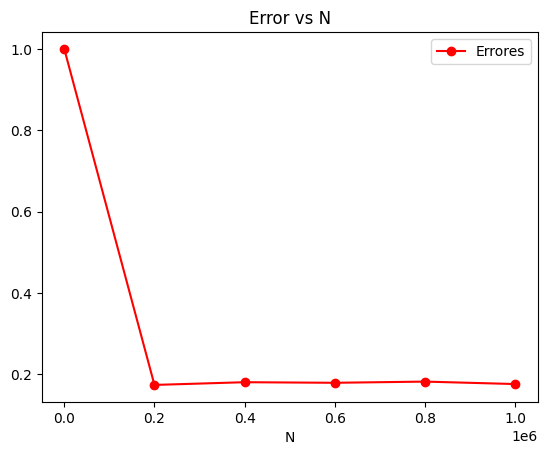

In [180]:
def f(N):
  error=0
  contadorintentosvalidos=0
  éxito=0
  for e in range(int(N)):
    palos=list(np.linspace(1,13,13))
    baraja=palos+palos+palos+palos
    random.shuffle(baraja)
    unaparte=baraja[0:25]
    otraparte=baraja[26:51]
    for i in range(len(unaparte)):
      if unaparte[i]==13:
        #unaparte.pop(unaparte[int(i)]) #esto funciona con el indice
        unaparte.pop(i)
        break
      if i==len(unaparte)-1:
        error=error+1

    if otraparte[0]==13:
      éxito=éxito+1
      contadorintentosvalidos=contadorintentosvalidos+1
    else:
      contadorintentosvalidos=contadorintentosvalidos+1
    #print(error,contadorintentosvalidos,éxito)
  for i in range(100):
    if contadorintentosvalidos==N:
      return éxito/N
      break
    else:
      for e in range(error):
        error=0
        palos=list(np.linspace(1,13,13))
        baraja=palos+palos+palos+palos
        random.shuffle(baraja)
        unaparte=baraja[0:25]
        otraparte=baraja[26:51]
        for i in range(len(unaparte)):
          if unaparte[i]==13:
            #unaparte.pop(unaparte[int(i)]) #esto funciona con el indice
            unaparte.pop(i)
            break
          if i==len(unaparte):
           error=error+1

Errores=[]
for i in list(np.linspace(1,1e6,6)):
  Errores.append(abs(f(int(i))-0.0937)/0.0937)

plt.plot(list(np.linspace(1,1e6,6)),Errores,label="Errores",color="red",marker="o")
plt.xlabel("N")
plt.legend()
plt.title("Error vs N")
plt.show()
#tarda 2 min o así en ejecutar pero sí va!!!

## <font color='green'>**> Ejercicio #3 [3.5 puntos]**</font>

El método **Multiplicative Linear Congruential Generator** se usa para generar números aleatórios entre 0 y 1. El método consiste en comenzar con un número entero arbitrario, $z_0$ (al que se denomina “semilla”), comprendido entre 0 y un número entero grande, $m$, ambos elegidos y fijados por nosotros.

Para generar otro número entero entre 0 y $m$ se procede según:

$$
z_{n+1} = mod(a·z_n + b, m)
$$

donde $a$ y $b$ son constantes convenientemente elegidas, y dónde $mod(x, m)$ es el resto de dividir $x$ entre $m$. Para obtener una secuencia de números reales entre 0 y 1 dividimos los anteriores por $m$.

Si partimos de la misma "semilla", dados $a$, $b$ y $m$, la secuencia de números aleatorios es la misma.

Hay varios valores que se pueden usar (https://es.wikipedia.org/wiki/Generador_lineal_congruencial). En este ejercicio usaremos un $z_0 = 10$ y los valores que se usan en *Numerical Recipes*:

$a = 1664525$

$b = 1013904223$

$m = 2·10^{32}$


**3.1 [1.5 puntos]:** Implementa una función que devuelva una lista de N números aleatorios entre 0 y 1, implementado el método propuesto en este ejercicio. Para hacer que la función sea lo más genérica posible, pásale todas las variables como parámetros, es decir:

```
def MLCG(z0,a,b,m,N):
   # tu código ...
   # return "lista de N valores entre 0 y 1"
```

In [93]:
import math

def mod(x,m):
  t=math.trunc(x/m)
  resto=x-t*m
  return resto

def ZN1(N,a,b,z0,m):
  valoresnonormalizados=[]
  z=z0
  for i in range(N):
    z=mod(a*z+b,m)
    valoresnonormalizados.append(z)
  valoresnormalizados=[x/m for x in valoresnonormalizados]
  return valoresnormalizados

print(ZN1(100,1664525,1013904223,10,2*10**32))

[5.152747365e-24, 8.57688187724774e-18, 1.4276434306730864e-11, 2.3763481814411193e-05, 0.5549095671327883, 0.8472317043109059, 0.3526181105732921, 0.6605020091115952, 0.10671647796491228, 0.24548454560834007, 0.16327872226974988, 0.515186055399721, 0.06886422048358913, 0.2166004462084278, 0.8577250833023816, 0.8442838967318191, 0.6532075313158809, 0.2660635667859122, 0.458504320472154, 0.9040339121135428, 0.047560794861662356, 0.13206710852743234, 0.00382162432712611, 0.18923310958840991, 0.2417376480304181, 0.35858783172504155, 0.4106021247577399, 0.5017123769509151, 0.7942442219943284, 0.36361510958583204, 0.440283357049945, 0.6548935596371546, 0.7023550347663938, 0.5142445317475601, 0.8792071075883239, 0.2107584548654511, 0.7170849150285601, 0.7681879140442713, 0.987624540809217, 0.738790462026979, 0.19380545720984335, 0.028662214521925116, 0.9726271074038475, 0.1359513893263891, 0.486318507814455, 0.31421985570401995, 0.8053157337714463, 0.17175591667243387, 0.01719918299992677, 0

**3.2 [1 punto]:** Genera $10^6$ números aleatorios entre 0 y 1 usando tu función *MLCG()* y dibuja un histograma normalizado de los valores (*usando* 100 bines). Genera también $10^6$ valores aleatorios entre 0 y 1 usando la función integrada en la librería de Python *Numpy* (*np.random.uniform*, fijando un seed *np.random.seed(1000)*) y haz un histograma normalizado que muestre como se distribuyen estos nuevos números aleatorios (usando 100 bines).

Muestra el histograma junto con el obtenido con tu función *MLCG()*, de manera que sean bien visible los dos histogramas en la misma gráfica, y añade una línea a $y=1$ (usando *plt.hlines*), que equivale a la *pdf* de una distribución uniforme. Fija la escala $y$ como logaritmica.

(array([10183., 10007.,  9979., 10095.,  9995., 10034.,  9869., 10022.,
        10246.,  9711.,  9847.,  9870.,  9929.,  9888.,  9931., 10102.,
         9850.,  9684., 10045., 10151., 10084., 10014.,  9952.,  9988.,
        10026., 10027.,  9952.,  9960., 10008.,  9989., 10208.,  9989.,
        10179., 10196., 10019., 10021.,  9958., 10020., 10040., 10143.,
         9896.,  9960.,  9833.,  9960., 10044., 10024., 10074.,  9931.,
         9953.,  9783.,  9997., 10087., 10023., 10068.,  9739., 10006.,
        10203.,  9897.,  9932.,  9926., 10167., 10061., 10079., 10041.,
         9880., 10164., 10030., 10041., 10025.,  9899., 10033.,  9804.,
         9857.,  9981.,  9907.,  9910.,  9956.,  9903., 10039., 10086.,
        10061., 10174.,  9748.,  9972.,  9940., 10188., 10245., 10114.,
        10019.,  9946., 10041., 10034., 10186., 10039.,  9969., 10054.,
        10023.,  9885.,  9983.,  9969.]),
 array([8.22632874e-07, 1.00007683e-02, 2.00007140e-02, 3.00006596e-02,
        4.00006053e-02

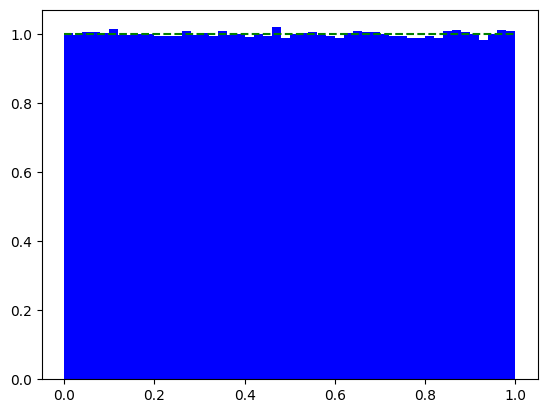

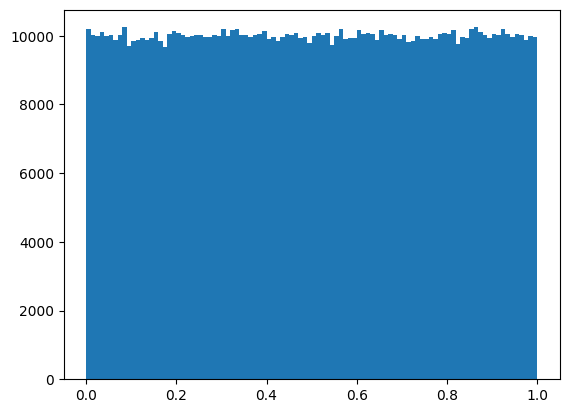

In [100]:
plt.figure()
plt.hist(ZN1(10**6,1664525,1013904223,10,2*10**32),bins=50,density="True",label="metodo raro",color="blue")
plt.hlines(y=1, xmin=0, xmax=1, colors='green', linestyles='dashed')
plt.figure()
plt.hist(np.random.uniform(0,1,10**6),bins=100,label="gaussiana")


**3.3 [1 punto]:** Para un histograma se pueden obtener los contenidos de cada bin usando

```
n, bins, patches = plt.hist(p, bins=100, density=True, alpha=0.5)
```

*n* será un array de 100 elementos que contiene el contenido en *y* de cada uno de los bines. Con esta información podemos calcular la suma de la diferencia absoluta para cada bin entre su contenido y lo esperado por una distribución uniforme (=1.0) para las dos distribuciones de números que has generado. Es decir:

$$
D = \sum_{i=0}^{100} |n_i-1.|
$$

Imprime por pantalla estas "distancias" evaluadas para tus dos distribuciones: $D_{MLCG}$ y $D_{np.random}$. La que tenga menor valor se aproximará más a la distribución uniforme... Puedes anular que se muestre una gráfica usando *plt.close()* en vez de *plt.show()*.

In [ ]:
# Ejercicio 3.3

# tu código aquí
